### Introducción a los modelos de clasificación de Machine Learning
En el aprendizaje automático (Machine Learning), la clasificación se refiere al proceso de asignar una etiqueta a un objeto. Por ejemplo, si estamos tratando de identificar si una imagen es un perro o un gato, la clasificación implicaría etiquetar la imagen como "perro" o "gato". Existen muchos modelos de clasificación diferentes que se utilizan en Machine Learning, y cada uno de ellos tiene sus propias fortalezas y debilidades. En esta clase de Jupyter Notebook, exploraremos algunos de los modelos más comunes de clasificación de Machine Learning, y veremos cómo se comparan entre sí en términos de rendimiento.

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

# Context 

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Contexto

Las enfermedades cardiovasculares (ECV) son la causa número 1 de muerte a nivel mundial, cobrando aproximadamente 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que se pueden usar para predecir una posible enfermedad cardíaca.

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección temprana y un manejo en el que un modelo de aprendizaje automático puede ser de gran ayuda

In [2]:
df=pd.read_csv("heart.csv",usecols =['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',  'output'] )
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   output  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
output        int64
dtype: object

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
output        int64
dtype: object

In [6]:
string_col=df.select_dtypes("string").columns.to_list()

In [7]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("output")

In [8]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

Edad: edad del paciente [años]

Sexo: sexo del paciente [M: Hombre, F: Mujer]

ChestPainType: tipo de dolor torácico [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]

BP en reposo: presión arterial en reposo [mm Hg]

Colesterol: colesterol sérico [mm/dl]

FastingBS: azúcar en sangre en ayunas [1: si FastingBS > 120 mg / dl, 0: de lo contrario]

ECG en reposo: resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación del ST o depresión de > 0,05 mV), HVI: mostrando hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]

MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]

EjercicioAngina: angina inducida por el ejercicio [Y: Sí, N: No]

Oldpeak: oldpeak = ST [Valor numérico medido en depresión]

ST_Slope: la pendiente del segmento ST de ejercicio máximo [Arriba: pendiente ascendente, Plana: plana, Abajo: pendiente descendente]

output: clase de salida [1: enfermedad cardíaca, 0: normal]

### Matriz de correlación
Es necesario eliminar las variables correlacionadas para mejorar el modelo. Uno puede encontrar correlaciones usando la función pandas ".corr()" y puede visualizar la matriz de correlación usando plotly express.
Los tonos más claros representan una correlación positiva
Los tonos más oscuros representan una correlación negativa

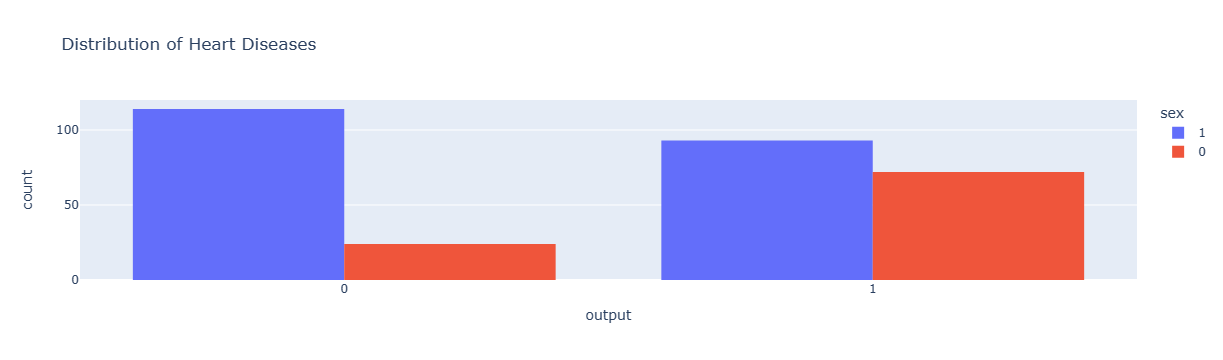

In [9]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="output",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

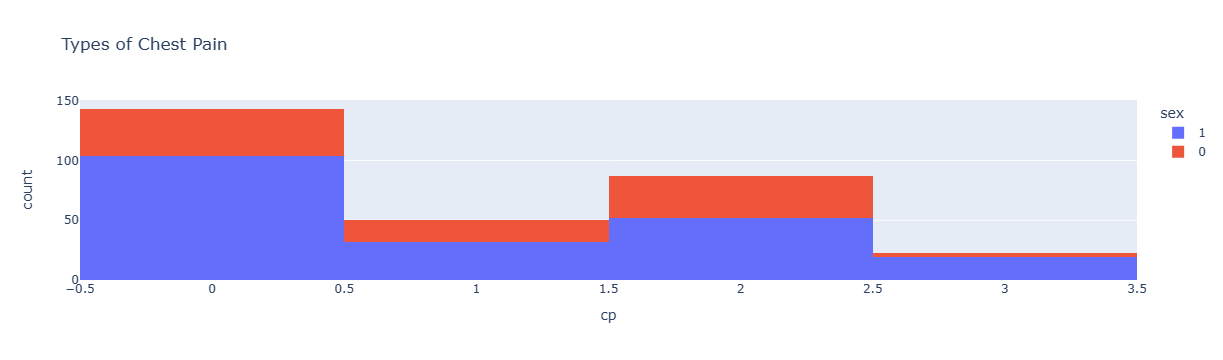

In [10]:
fig=px.histogram(df,
                 x="cp",
                 color="sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [11]:
fig=px.histogram(df,
                 x="sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [12]:
fig=px.histogram(df,
                 x="restecg",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

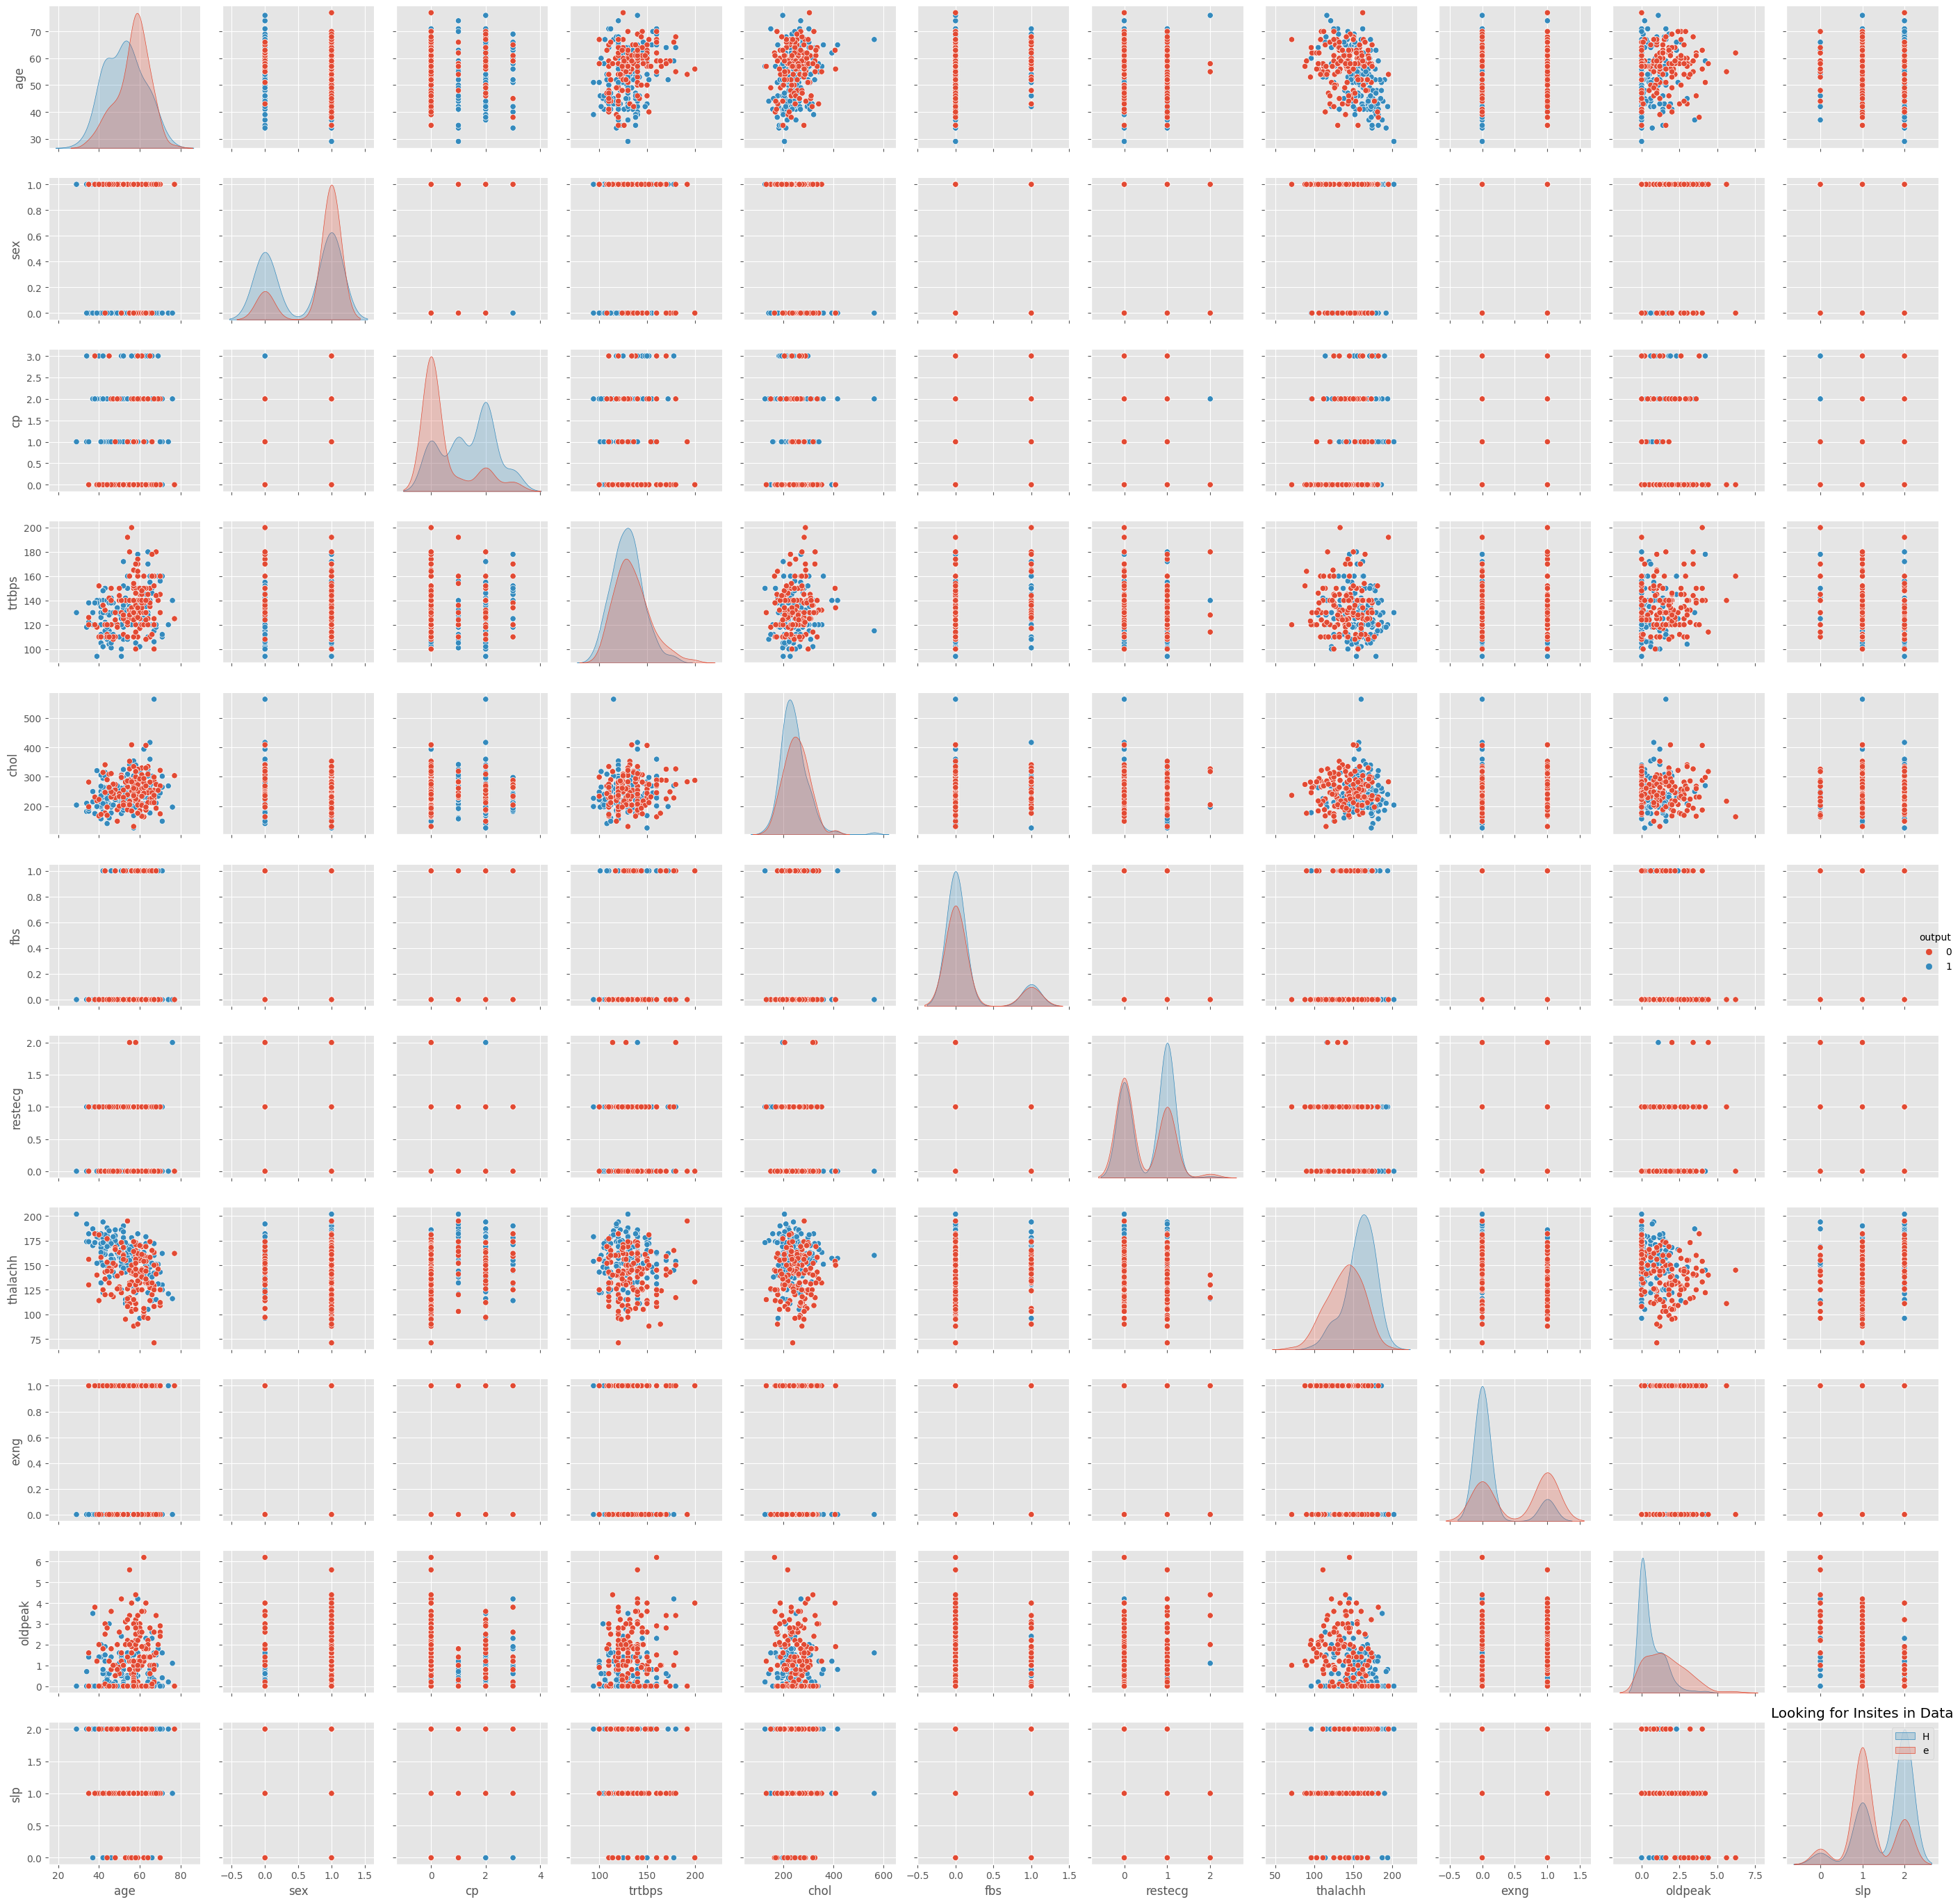

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="output")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

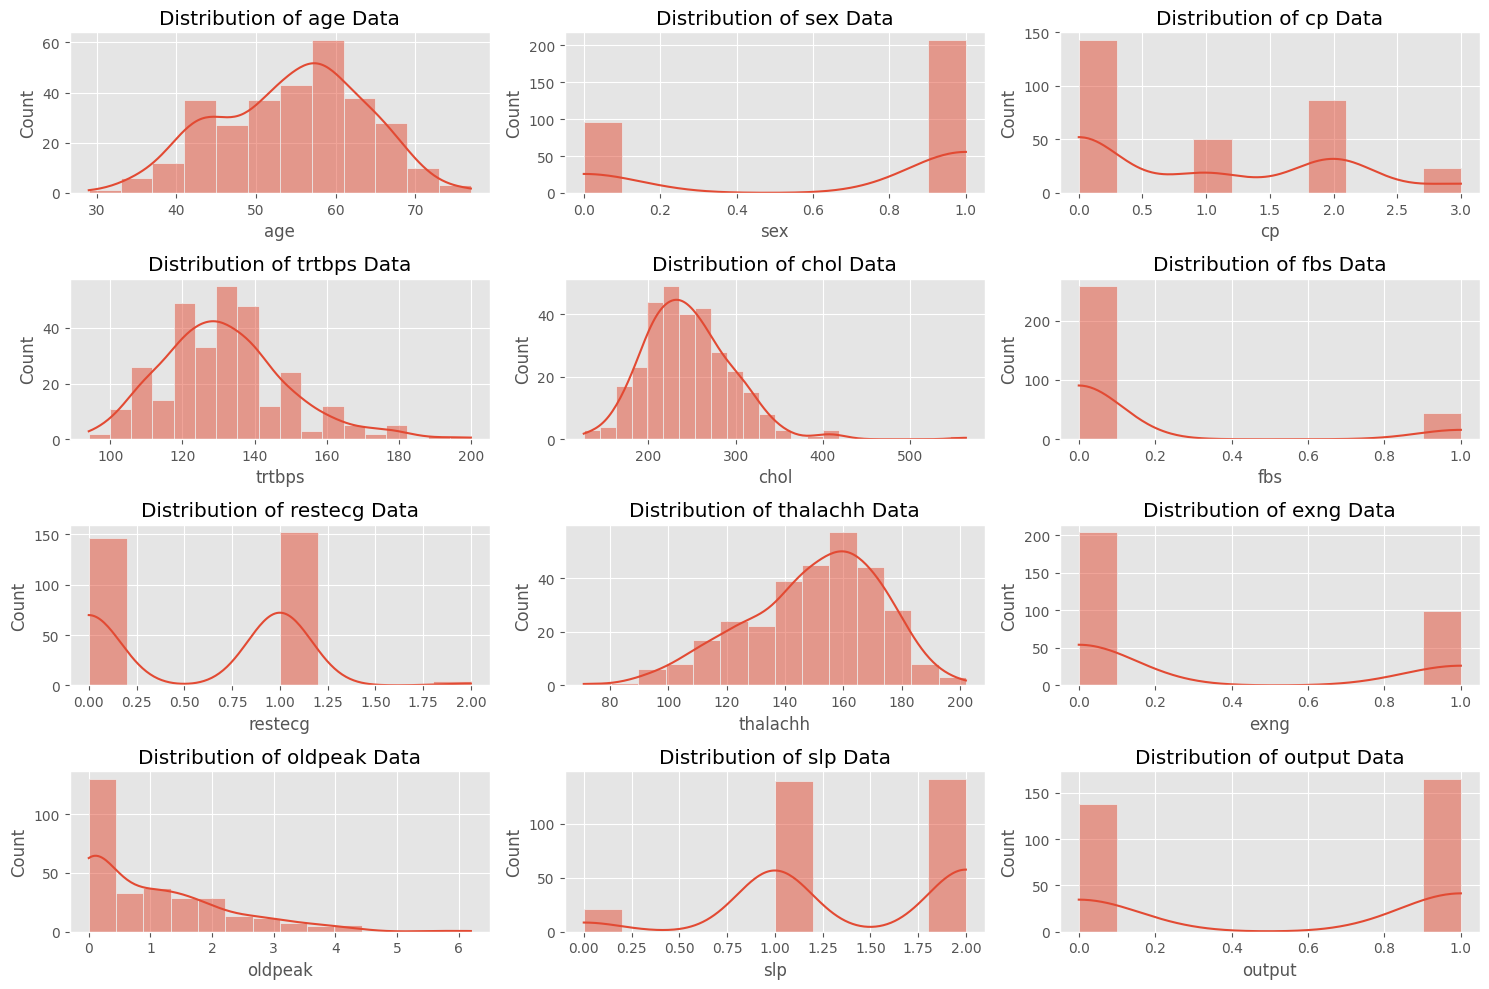

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

### OUTLIER
Un diagrama de caja (o diagrama de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución. El diagrama de caja (también conocido como diagrama de caja y bigotes) es una forma estandarizada de mostrar la distribución de datos basada en el resumen de cinco números:

* Mínimo
* Primer cuartil
* Mediana
* Tercer cuartil
* Máximo.
En el diagrama de caja más simple, el rectángulo central abarca desde el primer cuartil hasta el tercer cuartil (el rango intercuartil o IQR). Un segmento dentro del rectángulo muestra la mediana y los "bigotes" por encima y por debajo del cuadro muestran las ubicaciones del mínimo y máximo.
​

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'output'],
      dtype='object')

In [16]:

fig = px.box(df,y="age",x="output",title=f"Distrubution of Age")
fig.show()

In [17]:
fig = px.box(df,y="trtbps",x="output",title=f"Distrubution of RestingBP",color="sex")
fig.show()

In [21]:
fig = px.box(df,y="chol",x="output",title=f"Distrubution of Cholesterol")
fig.show()

In [22]:
fig = px.box(df,y="oldpeak",x="output",title=f"Distrubution of Oldpeak")
fig.show()

In [23]:
fig = px.box(df,y="thalachh",x="output",title=f"Distrubution of MaxHR")
fig.show()

In [25]:
df.shape

(303, 12)

### Data Preprocessing

El preprocesamiento de datos es un paso integral en el aprendizaje automático, ya que la calidad de los datos y la información útil que se puede derivar de ellos afecta directamente la capacidad de aprendizaje de nuestro modelo; Por lo tanto, es extremadamente importante que preprocesemos nuestros datos antes de introducirlos en nuestro modelo.

Los conceptos que cubriré en este artículo son

1. Control de valores nulos
2. Escalado de características
3. Manejo de variables categóricas

###  Manejo de valores nulos:
En cualquier conjunto de datos del mundo real, siempre hay pocos valores nulos. Realmente no importa si se trata de una regresión, clasificación o cualquier otro tipo de problema, ningún modelo puede manejar estos valores NULL o NaN por sí solo, por lo que debemos intervenir.

> En python NULL se representa con NaN. Así que no se confunda entre estos dos, se pueden usar intercambiablemente.

In [26]:
# Checking for NULLs in the data
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
output      0
dtype: int64

### 2. Escalado de características
¿Por qué deberíamos usar la escala de características?
La primera pregunta que debemos abordar: ¿por qué necesitamos escalar las variables en nuestro conjunto de datos? Algunos algoritmos de aprendizaje automático son sensibles al escalado de características, mientras que otros son prácticamente invariantes a él. Permítanme explicarlo con más detalle.

#### 1. Algoritmos basados en la distancia:
Los algoritmos de distancia como "KNN", "K-means" y "SVM" son los más afectados por la gama de características. Esto se debe a que detrás de escena están utilizando distancias entre puntos de datos para determinar su similitud. Si dos características tienen escalas diferentes, existe la posibilidad de que se otorgue un mayor peso a las características con mayor magnitud. Esto afectará el rendimiento del algoritmo de aprendizaje automático y, obviamente, no queremos que nuestro algoritmo esté sesgado hacia una característica.

Por lo tanto, escalamos nuestros datos antes de emplear un algoritmo basado en la distancia para que todas las características contribuyan por igual al resultado.

<img src="https://miro.medium.com/max/1000/0*MZKG8sTIdSNv6TXB" width=50%>

#### 2. Algoritmos basados en árbol:
Los algoritmos basados en árboles, por otro lado, son bastante insensibles a la escala de las características. Piénselo, un árbol de decisión solo divide un nodo en función de una sola característica. El árbol de decisión divide un nodo en una característica que aumenta la homogeneidad del nodo. Esta división en una característica no está influenciada por otras características.

Por lo tanto, prácticamente no hay efecto de las características restantes en la división. ¡Esto es lo que los hace invariantes a la escala de las características!
<img src="https://miro.medium.com/max/925/0*U0rcW7XrdHpvI0hU.jpeg" width=70%>

¿Qué es la normalización?
La normalización es una técnica de escalado en la que los valores se desplazan y se reescalan para que terminen oscilando entre 0 y 1. También se conoce como escala Min-Max.

Aquí está el fromula para la normalización:

<img src="https://i.stack.imgur.com/EuitP.png" width=40%>

Aquí, Xmax y Xmin son los valores máximo y mínimo de la característica respectivamente.

Cuando el valor de X es el valor mínimo en la columna, el numerador será 0, y por lo tanto X' es 0 Por otro lado, cuando el valor de X es el valor máximo en la columna, el numerador es igual al denominador y, por lo tanto, el valor de X' es 1 Si el valor de X está entre el valor mínimo y el valor máximo, entonces el valor de X' está entre 0 y 1


¿Qué es la estandarización?
La estandarización es otra técnica de escalado donde los valores se centran alrededor de la media con una desviación estándar unitaria. Esto significa que la media del atributo se convierte en cero y la distribución resultante tiene una desviación estándar unitaria

Aquí está la fórmula para la estandarización
<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

#### 3. Manejo de variables categóricas
Las variables/características categóricas son cualquier tipo de característica que se puede clasificar en dos tipos principales:

* Nominal
* Ordinal

Las variables nominales son variables que tienen dos o más categorías que no tienen ningún tipo de orden asociado. Por ejemplo, si el género se clasifica en dos grupos, es decir, masculino y femenino, puede considerarse como una variable nominal. Las variables ordinales, por otro lado, tienen "niveles" o categorías con un orden particular asociado a ellas. Por ejemplo, una variable categórica ordinal puede ser una característica con tres niveles diferentes: bajo, medio y alto. El orden es importante.

Es un problema de clasificación binaria: el objetivo aquí no está sesgado, pero usamos la mejor métrica para este problema de clasificación binaria que sería Área bajo la curva ROC (AUC). También podemos usar precisión y recuperación, pero AUC combina estas dos métricas. Por lo tanto, usaremos AUC para evaluar el modelo que construimos sobre este conjunto de datos.

Tenemos que saber que las computadoras no entienden los datos de texto y, por lo tanto, necesitamos convertir estas categorías en números. Una forma sencilla de hacerlo puede ser usar:

* Codificación de etiquetas
from sklearn.preprocessing import LabelEncoder
* Una codificación en onehot
pd.get_dummies()

Pero necesitamos entender dónde usar qué tipo de codificación de etiqueta:

Para los algoritmos de aprendizaje automático no basados en árboles, la mejor manera de hacerlo será usar One-Hot Encoding

* One-Hot-Encoding tiene la ventaja de que el resultado es binario en lugar de ordinal y que todo se encuentra en un espacio vectorial ortogonal.
* La desventaja es que para una alta cardinalidad, el espacio de características realmente puede explotar rápidamente y comienzas a luchar con la maldición de la dimensionalidad. En estos casos, normalmente empleo una codificación en caliente seguida de PCA para la reducción de dimensionalidad. Encuentro que la combinación juiciosa de un solo caliente más PCA rara vez puede ser superada por otros esquemas de codificación. PCA encuentra la superposición lineal, por lo que naturalmente tenderá a agrupar características similares en la misma característica

Para los algoritmos de aprendizaje automático basados en árboles, la mejor manera de hacerlo es con la codificación de etiquetas

* LabelEncoder puede convertir [perro,gato,perro,ratón,gato] en [1,2,1,3,2], pero entonces la ordinalidad impuesta significa que el promedio de perro y ratón es gato. Todavía hay algoritmos como árboles de decisión y bosques aleatorios que pueden funcionar con variables categóricas muy bien y LabelEncoder se puede usar para almacenar valores utilizando menos espacio en disco.

In [27]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

In [28]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   29    1   3      31    64    1        0        49     0       22    0   
1    3    1   2      22    80    0        1        84     0       32    0   
2    7    0   1      22    35    0        0        71     0       14    2   
3   22    1   1      14    67    0        1        76     0        8    2   
4   23    0   0      14   145    0        1        62     1        6    2   

   output  
0       1  
1       1  
2       1  
3       1  
4       1


## METRICAS

## CLASIFICACION
Exactitud (Accuracy): Esta métrica mide la proporción de predicciones correctas que hace el modelo. Se calcula como el número de predicciones correctas dividido por el número total de predicciones. Por ejemplo, si un modelo de clasificación hizo 90 predicciones correctas de un total de 100, su exactitud sería del 90%.

Precisión (Precision): La precisión mide la proporción de predicciones positivas que son realmente positivas. Se calcula como el número de verdaderos positivos dividido por el número total de predicciones positivas (verdaderos positivos + falsos positivos). Por ejemplo, si un modelo de clasificación hizo 20 predicciones positivas y 18 de ellas eran realmente positivas, su precisión sería del 90%.

Sensibilidad o tasa de verdaderos positivos (Recall or True Positive Rate): La sensibilidad mide la proporción de verdaderos positivos que el modelo identifica correctamente. Se calcula como el número de verdaderos positivos dividido por el número total de positivos reales (verdaderos positivos + falsos negativos). Por ejemplo, si hay 50 casos positivos reales y un modelo de clasificación identifica correctamente 45 de ellos, su sensibilidad sería del 90%.

Puntuación F1 (F1 Score): La puntuación F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre ambas métricas. Se calcula como la media armónica de la precisión y la sensibilidad. Por ejemplo, si un modelo tiene una precisión del 90% y una sensibilidad del 80%, su puntuación F1 sería del 84%.

## REGRESION

Error medio absoluto (Mean Absolute Error, MAE): Esta métrica mide el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. Es útil porque da una idea del tamaño promedio del error en unidades de la variable objetivo. Cuanto más pequeña sea la MAE, mejor será el modelo.

Error cuadrático medio (Mean Squared Error, MSE): Esta métrica mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Es similar al MAE, pero castiga más fuertemente los errores grandes.

Raíz del error cuadrático medio (Root Mean Squared Error, RMSE): Esta métrica es la raíz cuadrada del MSE y se utiliza para proporcionar una medida del error en las mismas unidades que la variable objetivo. Es útil para interpretar la magnitud del error en un contexto más familiar.

Coeficiente de determinación (R²): Esta métrica mide la proporción de la variabilidad en la variable objetivo que se explica por el modelo. Toma valores entre 0 y 1, siendo 1 el valor ideal que indica que el modelo explica toda la variabilidad en la variable objetivo.

## COMO ELEGIR NUESTRA METRICA

Exactitud (Accuracy): La exactitud es una métrica útil cuando todas las clases tienen una distribución similar y se busca un modelo que prediga todas las clases de manera equilibrada. Sin embargo, la exactitud puede ser engañosa cuando las clases no están equilibradas y una clase es mucho más frecuente que las otras.

Precisión (Precision): La precisión es una métrica útil cuando se quiere minimizar el número de falsos positivos y se desea que el modelo tenga una tasa alta de acierto en la clase positiva. Por ejemplo, en un modelo de detección de spam, es importante tener una alta precisión para evitar que mensajes legítimos sean marcados como spam.

Sensibilidad o tasa de verdaderos positivos (Recall or True Positive Rate): La sensibilidad es una métrica útil cuando se quiere minimizar el número de falsos negativos y se desea que el modelo tenga una tasa alta de acierto en la clase positiva. Por ejemplo, en un modelo de detección de cáncer, es importante tener una alta sensibilidad para asegurar que se detecten todos los casos positivos.

Puntuación F1 (F1 Score): La puntuación F1 es una métrica útil cuando se busca un equilibrio entre la precisión y la sensibilidad. Es especialmente útil cuando las clases están desequilibradas y una clase es mucho más frecuente que las otras.

El ROC AUC (Receiver Operating Characteristic Area Under the Curve) es una métrica comúnmente utilizada en problemas de clasificación binaria para evaluar el rendimiento de un modelo.
El ROC AUC se basa en la curva ROC, que representa la tasa de verdaderos positivos (sensibilidad) en función de la tasa de falsos positivos (1 - especificidad) para diferentes umbrales de clasificación. La curva ROC es útil porque permite ver cómo cambia el rendimiento del modelo en función del umbral de clasificación.
El ROC AUC es el área bajo la curva ROC y se utiliza como una medida general del rendimiento del modelo. El ROC AUC toma valores entre 0 y 1, siendo 1 el valor ideal que indica un modelo que es capaz de distinguir perfectamente entre las dos clases. Un valor de 0.5 indica que el modelo no es mejor que un clasificador aleatorio.

In [ ]:
Falso positivo:  Tenia covid covid pero no tenias 

Falso  Negativo : Alguien no tiene covid pero yo le digo que si tiene

#### Modelos de clasificación comunes
##### Regresión Logística
La Regresión Logística es un modelo de clasificación lineal que se utiliza para predecir la probabilidad de que una observación pertenezca a una determinada categoría. La salida del modelo es un valor entre 0 y 1, que representa la probabilidad de que la observación pertenezca a la categoría positiva. Si la probabilidad es mayor que un umbral predeterminado (generalmente 0.5), la observación se clasifica como positiva; de lo contrario, se clasifica como negativa.

Ejemplo práctico:
Supongamos que tenemos un conjunto de datos que contiene información sobre el salario de una persona, su edad y si esa persona ha sido contratada o no. Podemos utilizar la Regresión Logística para predecir la probabilidad de que una persona sea contratada en función de su salario y edad.

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7912087912087912


##### Árboles de decisión
Los árboles de decisión son un modelo de clasificación no lineal que se utiliza para separar las observaciones en función de sus características. El modelo divide el conjunto de datos en ramas, cada una de las cuales representa una decisión basada en una característica específica. El resultado final del modelo es una hoja que representa la clasificación final de la observación.


In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5824175824175825


##### Naive Bayes
Naive Bayes es un modelo de clasificación probabilístico que utiliza el teorema de Bayes para predecir la probabilidad de que una observación pertenezca a una determinada categoría. El modelo asume que todas las características son independientes entre sí, lo que significa que la presencia o ausencia de una característica no afecta la presencia o ausencia de otra característica.


In [33]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7912087912087912


##### Support Vector Machines (SVM)
Las Máquinas de Vectores de Soporte (SVM) son un modelo de clasificación que se utiliza para separar los datos en función de una línea o un hiperplano. El modelo busca la línea o el hiperplano que mejor separa los datos de diferentes clases. SVM es un modelo muy potente, pero puede ser difícil de ajustar si hay muchas características o si los datos son muy ruidosos.



In [34]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7912087912087912


##### Random Forest
Los bosques aleatorios (Random Forest) son un conjunto de árboles de decisión que se utilizan para clasificar los datos. Cada árbol en el bosque toma una decisión individual y la decisión final se basa en la mayoría de votos de todos los árboles en el bosque. Los bosques aleatorios son muy útiles para clasificar conjuntos de datos grandes y complejos.



In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7362637362637363


##### Gradient Boosting
El Gradient Boosting es un modelo de clasificación que se utiliza para crear un conjunto de modelos de árboles de decisión que trabajan juntos para hacer una predicción. Cada árbol en el conjunto se ajusta para corregir los errores del modelo anterior, y así sucesivamente. El modelo es muy útil para conjuntos de datos grandes y complejos, pero puede ser muy lento y requerir mucha memoria.


In [37]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7252747252747253


##### XGBoost
XGBoost (eXtreme Gradient Boosting) es un algoritmo de aprendizaje automático que utiliza el boosting para crear un modelo predictivo a partir de múltiples modelos débiles. A diferencia del Gradient Boosting, XGBoost utiliza un algoritmo de optimización para mejorar el rendimiento y la velocidad del modelo. Es especialmente útil para conjuntos de datos grandes y complejos y es uno de los modelos más utilizados en competencias de Machine Learning.



In [45]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

params = {
    "objective": "binary:logistic",
    "max_depth": 20,
    "learning_rate": 0.2,
    "n_estimators": 150
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7582417582417582


In [46]:

params = {
    "objective": "binary:logistic",
    "max_depth": 20,
    "learning_rate": 0.15,
    "n_estimators": 150
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7252747252747253


##### LightGBM
LightGBM (Light Gradient Boosting Machine) es otro algoritmo de boosting que se ha vuelto muy popular en los últimos años. Al igual que XGBoost, utiliza un algoritmo de optimización para mejorar el rendimiento y la velocidad del modelo. Sin embargo, LightGBM utiliza una estrategia de división de hojas basada en la diferencia de los histogramas, lo que lo hace aún más rápido y eficiente que XGBoost.

Ejemplo práctico:
Supongamos que tenemos un conjunto de datos que contiene información sobre la calidad de diferentes vinos y su precio. Podemos utilizar LightGBM para predecir el precio de un vino en función de su calidad.

In [49]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp',]]
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "max_depth": 6,
    "learning_rate": 0.3,
    "n_estimators": 1500
}

model = lgb.LGBMClassifier(**params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7362637362637363


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
import shap

# Carga los datos
data = df_tree.copy()
X = data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp']]
y = data["output"]

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Entrenamiento y evaluación de los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results.loc[name] = [accuracy, precision, recall, f1, roc_auc]

# Muestra los resultados
print(results)



                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.791209   0.750000  0.893617  0.815534  0.787718
Decision Tree        0.604396   0.603774  0.680851  0.640000  0.601789
Random Forest        0.780220   0.754717  0.851064  0.800000  0.777805
Gradient Boosting    0.714286   0.705882  0.765957  0.734694  0.712524
AdaBoost             0.714286   0.698113  0.787234  0.740000  0.711799
XGBoost              0.725275   0.720000  0.765957  0.742268  0.723888
LightGBM             0.747253   0.722222  0.829787  0.772277  0.744439


Permutation explainer: 92it [01:24,  1.01it/s]                                                                                                                                                                                     


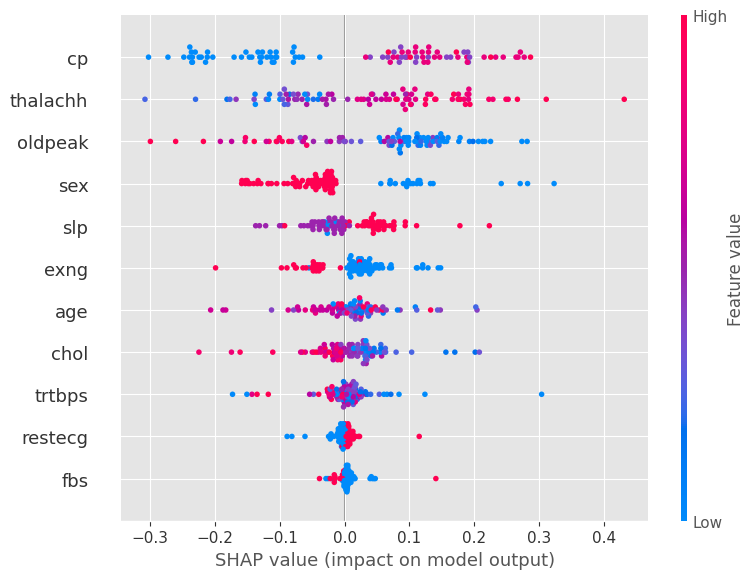

In [52]:
# Visualización de las características más importantes usando SHAP
explainer = shap.Explainer(models["Random Forest"].predict, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

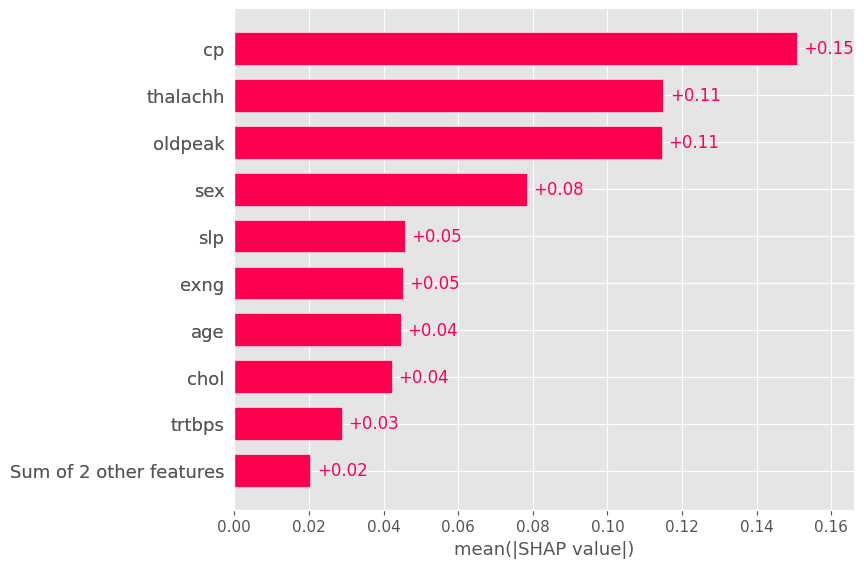

In [53]:
shap.plots.bar(shap_values)

In [54]:
#probaremos el siguiente modelo
import sklearn.datasets
data = sklearn.datasets.fetch_openml("california_housing", version=1, as_frame=True, return_X_y=False)
data = data["frame"]

In [56]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [58]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
df_tree = data.apply(LabelEncoder().fit_transform)
df_tree.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        170       515                  40          733             128   
1        171       513                  20         5255            1103   
2        169       512                  51         1316             189   
3        168       512                  51         1123             234   
4        168       512                  51         1476             279   

   population  households  median_income  median_house_value  ocean_proximity  
0         296         125          12416                3665                3  
1        2346        1129          12411                3074                3  
2         469         176          11941                3017                3  
3         531         218          10269                2917                3  
4         538         258           6656                2925                3

In [59]:
df_tree["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [62]:
data["ocean_proximity_label"] = np.where(data["ocean_proximity"]=="<1H OCEAN" ,0 ,  
np.where(data["ocean_proximity"]=="INLAND",1,
np.where(data["ocean_proximity"]=="NEAR OCEAN",2 ,
np.where(data["ocean_proximity"]=="NEAR BAY",3,
np.where(data["ocean_proximity"]=="ISLAND",4,0 )))))

In [69]:
data_limpia = data.dropna()

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos

# Dividir los datos en entrenamiento y prueba
X = data_limpia.drop(['median_house_value','ocean_proximity'], axis=1)
y = data_limpia['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

# Entrenar los modelos
models = [lr, ridge, lasso, dt, rf, gb, xgb, lgbm]
model_names = ["Linear Regression", "Ridge", "Lasso", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM"]
train_scores = []
test_scores = []
test_scores_ecm = []
for model in models:
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    test_scores_ecm.append(mean_squared_error(model.predict(X_test), y_test))
# Consolidar los resultados en un DataFrame
results = pd.DataFrame({
    "Model": model_names,
    "Train Score": train_scores,
    "Test Score": test_scores,
    "test_scores_ecm": test_scores_ecm
})

In [75]:
results

Model  Train Score  Test Score  test_scores_ecm
0  Linear Regression     0.636301    0.639588     4.928695e+09
1              Ridge     0.636301    0.639588     4.928699e+09
2              Lasso     0.636301    0.639589     4.928691e+09
3      Decision Tree     1.000000    0.652637     4.750255e+09
4      Random Forest     0.974311    0.818419     2.483151e+09
5  Gradient Boosting     0.788018    0.768357     3.167755e+09
6            XGBoost     0.935288    0.831466     2.304738e+09
7           LightGBM     0.874320    0.825849     2.381548e+09

In [76]:
#tarea hallar el mejor modelo para la prediccion de la diabetes utilizando nuestros codigos anterior
import sklearn.datasets
 
data = sklearn.datasets.fetch_openml("diabetes", version=1, as_frame=True, return_X_y=False)
data = data["frame"]


In [77]:
data 

preg   plas   pres  skin   insu  mass   pedi   age            class
0     6.0  148.0   72.0  35.0    0.0  33.6  0.627  50.0  tested_positive
1     1.0   85.0   66.0  29.0    0.0  26.6  0.351  31.0  tested_negative
2     8.0  183.0   64.0   0.0    0.0  23.3  0.672  32.0  tested_positive
3     1.0   89.0   66.0  23.0   94.0  28.1  0.167  21.0  tested_negative
4     0.0  137.0   40.0  35.0  168.0  43.1  2.288  33.0  tested_positive
5     5.0  116.0   74.0   0.0    0.0  25.6  0.201  30.0  tested_negative
6     3.0   78.0   50.0  32.0   88.0  31.0  0.248  26.0  tested_positive
7    10.0  115.0    0.0   0.0    0.0  35.3  0.134  29.0  tested_negative
8     2.0  197.0   70.0  45.0  543.0  30.5  0.158  53.0  tested_positive
9     8.0  125.0   96.0   0.0    0.0   0.0  0.232  54.0  tested_positive
10    4.0  110.0   92.0   0.0    0.0  37.6  0.191  30.0  tested_negative
11   10.0  168.0   74.0   0.0    0.0  38.0  0.537  34.0  tested_positive
12   10.0  139.0   80.0   0.0    0.0  27.1  1.441  57.0  tested_negative
13    1.0  189.0   60.0  23.0  846.0  30.1  0.398  59.0  tested_positive
14    5.0  166.0   72.0  19.0  175.0  25.8  0.587  51.0  tested_positive
15    7.0  100.0    0.0   0.0    0.0  30.0  0.484  32.0  tested_positive
16    0.0  118.0   84.0  47.0  230.0  45.8  0.551  31.0  tested_positive
17    7.0  107.0   74.0   0.0    0.0  29.6  0.254  31.0  tested_positive
18    1.0  103.0   30.0  38.0   83.0  43.3  0.183  33.0  tested_negative
19    1.0  115.0   70.0  30.0   96.0  34.6  0.529  32.0  tested_positive
20    3.0  126.0   88.0  41.0  235.0  39.3  0.704  27.0  tested_negative
21    8.0   99.0   84.0   0.0    0.0  35.4  0.388  50.0  tested_negative
22    7.0  196.0   90.0   0.0    0.0  39.8  0.451  41.0  tested_positive
23    9.0  119.0   80.0  35.0    0.0  29.0  0.263  29.0  tested_positive
24   11.0  143.0   94.0  33.0  146.0  36.6  0.254  51.0  tested_positive
25   10.0  125.0   70.0  26.0  115.0  31.1  0.205  41.0  tested_positive
26    7.0  147.0   76.0   0.0    0.0  39.4  0.257  43.0  tested_positive
27    1.0   97.0   66.0  15.0  140.0  23.2  0.487  22.0  tested_negative
28   13.0  145.0   82.0  19.0  110.0  22.2  0.245  57.0  tested_negative
29    5.0  117.0   92.0   0.0    0.0  34.1  0.337  38.0  tested_negative
30    5.0  109.0   75.0  26.0    0.0  36.0  0.546  60.0  tested_negative
31    3.0  158.0   76.0  36.0  245.0  31.6  0.851  28.0  tested_positive
32    3.0   88.0   58.0  11.0   54.0  24.8  0.267  22.0  tested_negative
33    6.0   92.0   92.0   0.0    0.0  19.9  0.188  28.0  tested_negative
34   10.0  122.0   78.0  31.0    0.0  27.6  0.512  45.0  tested_negative
35    4.0  103.0   60.0  33.0  192.0  24.0  0.966  33.0  tested_negative
36   11.0  138.0   76.0   0.0    0.0  33.2  0.420  35.0  tested_negative
37    9.0  102.0   76.0  37.0    0.0  32.9  0.665  46.0  tested_positive
38    2.0   90.0   68.0  42.0    0.0  38.2  0.503  27.0  tested_positive
39    4.0  111.0   72.0  47.0  207.0  37.1  1.390  56.0  tested_positive
40    3.0  180.0   64.0  25.0   70.0  34.0  0.271  26.0  tested_negative
41    7.0  133.0   84.0   0.0    0.0  40.2  0.696  37.0  tested_negative
42    7.0  106.0   92.0  18.0    0.0  22.7  0.235  48.0  tested_negative
43    9.0  171.0  110.0  24.0  240.0  45.4  0.721  54.0  tested_positive
44    7.0  159.0   64.0   0.0    0.0  27.4  0.294  40.0  tested_negative
45    0.0  180.0   66.0  39.0    0.0  42.0  1.893  25.0  tested_positive
46    1.0  146.0   56.0   0.0    0.0  29.7  0.564  29.0  tested_negative
47    2.0   71.0   70.0  27.0    0.0  28.0  0.586  22.0  tested_negative
48    7.0  103.0   66.0  32.0    0.0  39.1  0.344  31.0  tested_positive
49    7.0  105.0    0.0   0.0    0.0   0.0  0.305  24.0  tested_negative
50    1.0  103.0   80.0  11.0   82.0  19.4  0.491  22.0  tested_negative
51    1.0  101.0   50.0  15.0   36.0  24.2  0.526  26.0  tested_negative
52    5.0   88.0   66.0  21.0   23.0  24.4  0.342  30.0  tested_negative
53    8.0  176.0   90.0  34.0  300.0  33.7  0.467  58.0  tested